# Hamoye Internship: Stage A

Firstly, I must acknowledge that other hamoye interns have been very helpful. Considering the fact that I data science two month ago, I ever expected to have done this without their notes

## Problem Definition

We are required to understand the data, make visualistions and draw some insights. To summarize we are to perform explorator data analysis(EDA)

## Data 

The data used in notebook is gotten from HamoyeA internship stage A

## Features

* 'Record_id' : record id
* 'Utility_id_ferc1'(renamed to 'utility_id'): Utility id assigned by the FERC
* 'Report_year': year of report
* 'Plant_name_ferc1'(renamed to 'plant_name': the name of the plant
* 'Fuel_type_code_pudl'(renamed to fuel_type): the type of fuel
* 'Fuel_unit': the unit of fuel
* 'Fuel_qty_burned': the quantity of fuel burned
* 'Fuel_mmbtu_per_unit': the measure of energy per unit
* 'fuel_cost_per_unit_burned': the fuel cost per unit burned
* 'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit
* 'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import difflib
import spellchecker as spl


sns.set_style('whitegrid')
np.set_printoptions(threshold=np.inf)

In [2]:
data = pd.read_csv('Data/StageA.csv')

In [3]:
data.duplicated().any()

False

In [4]:
len(data)

29523

In [5]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [6]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [7]:
data.rename({'utility_id_ferc1':'utility_id','plant_name_ferc1':'plant_name','fuel_type_code_pudl':'fuel_type'},axis=1,inplace=True)

In [8]:
data.isna().sum()

record_id                         0
utility_id                        0
report_year                       0
plant_name                        0
fuel_type                         0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

The code above shows us we have 180 empty values in the dataset of which all of it comes from the fuel_unit column. Let us work on filling the data first, but before that let's look at it a little but closer it to know what the best fit value is.

In [9]:
data[data['fuel_unit'].isna()]['fuel_type'].value_counts()

gas        53
coal       51
other      36
oil        21
nuclear    15
waste       4
Name: fuel_type, dtype: int64

It's logical to fill our missing data with the most common fuel_units in each fuel class (fuel_type_code_pudl)

In [10]:
data.groupby('fuel_type')['fuel_unit'].apply(lambda x: x.value_counts().index[0])

fuel_type
coal          ton
gas           mcf
nuclear    gramsU
oil           bbl
other         ton
waste         ton
Name: fuel_unit, dtype: object

The above tells us that ton is the most common unit for coal, as mcf is to gas, as gramsU is to nuclear, as bbl is too oil as ton is to others, and finally as ton is to waste. But let's look at it visually to confirm what we have seen

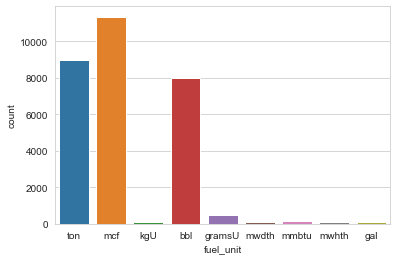

In [11]:
fig,ax = plt.subplots()
sns.countplot('fuel_unit',data=data)

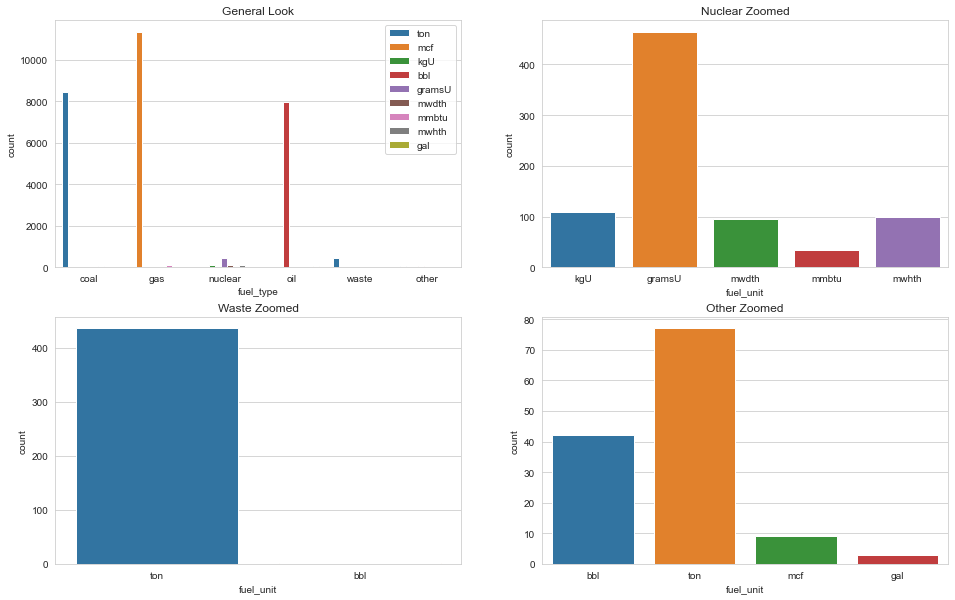

In [12]:
fig,ax = plt.subplots(figsize=(16,10),nrows=2,ncols=2)
sns.countplot('fuel_type',data=data,hue='fuel_unit',ax=ax[0,0])
ax[0,0].legend(loc=1)
ax[0,0].set_title('General Look')
# Decided to look at the ones that aren't shpwing so well because of the the wide range between them
sns.countplot('fuel_unit',data=data[data['fuel_type']=='nuclear'],ax=ax[0,1])
ax[0,1].set_title('Nuclear Zoomed')
sns.countplot('fuel_unit',data=data[data['fuel_type']=='waste'],ax=ax[1,0])
ax[1,0].set_title('Waste Zoomed')
sns.countplot('fuel_unit',data=data[data['fuel_type']=='other'],ax=ax[1,1])
ax[1,1].set_title('Other Zoomed');

from the above visualisation, it's obvious that our observations where right. Let's go ahead to write a function that will fill it acccordingly

In [13]:
COAL = data['fuel_type'] == 'coal'
GAS = data['fuel_type'] == 'gas'
NUCLEAR = data['fuel_type'] == 'nuclear'
OIL = data['fuel_type'] == 'oil'
WASTE = data['fuel_type'] == 'waste'
OTHER = data['fuel_type'] == 'other'


data.loc[COAL,'fuel_unit'] = data.loc[COAL,'fuel_unit'].fillna('ton')
data.loc[GAS,'fuel_unit'] = data.loc[GAS,'fuel_unit'].fillna('mcf')
data.loc[NUCLEAR,'fuel_unit'] = data.loc[NUCLEAR,'fuel_unit'].fillna('gramsU')
data.loc[OIL,'fuel_unit'] = data.loc[OIL,'fuel_unit'].fillna('bbl')
data.loc[WASTE,'fuel_unit'] = data.loc[WASTE,'fuel_unit'].fillna('ton')
data.loc[OTHER,'fuel_unit'] = data.loc[OTHER,'fuel_unit'].fillna('ton')

data.isna().sum()

record_id                       0
utility_id                      0
report_year                     0
plant_name                      0
fuel_type                       0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

Now our data is filled with no missing values let's move on

In [14]:
data.head()

,record_id,utility_id,report_year,plant_name,fuel_type,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [15]:
len(data['report_year'].unique()),data['report_year'].unique()

(25,
 array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018], dtype=int64))

Our data was obtained over a period of 25 years from 1994 to 2018

In [16]:
data.head()

,record_id,utility_id,report_year,plant_name,fuel_type,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [17]:
data.utility_id.unique()

array([  1,   2,   4,   6,   7,   9,  10,  11,  12,  15,  16,  17,  20,
        24,  26, 191,  31,   8,  42,  43,  44,  46,  50,  51,  54,  55,
        38,  73,  81, 127,  19,  36,  61,  63,  64,  68,  70,  72,  74,
        75,  77,  79,  80,  85,  96,  97,  98,  99,  27,  30,  52, 135,
        69,  87,  88, 121, 122, 102, 193, 194, 125, 126, 128, 129, 130,
       131, 132, 134, 137, 141, 142, 143, 145, 117, 146, 150, 151, 157,
       114, 115, 118, 161, 162, 163, 164, 166, 169, 170, 173, 176, 177,
       179, 182, 185, 186, 187, 188, 189,  33,  89, 200, 201, 204, 208,
       159, 119,  25,  49, 108, 155, 100, 107, 144, 116, 136,  67,  82,
        95, 133, 138, 148, 190,  56, 113,  32, 120, 147, 160, 175,  22,
        39,  62,  76, 101, 124, 154, 156, 174, 195, 104,  14,  57,  41,
        45, 149, 213, 210,  29,  94, 230,  71,  21, 202, 244, 226, 227,
        65, 171, 181, 221, 266, 245, 270, 276, 203, 271, 283, 281, 285,
       287, 196, 288, 294, 262, 178,  58, 432, 315, 403, 449, 45

In [18]:
data[data['utility_id']==1].sample(n=10)

,record_id,utility_id,report_year,plant_name,fuel_type,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
11274,f1_fuel_2003_12_1_0_7,1,2003,rockport total aeg,coal,ton,4927011.0,17.780000,21.419,21.962,1.235
8374,f1_fuel_2001_12_1_0_7,1,2001,rockport total aeg,coal,ton,4828780.0,17.672000,21.097,21.070,1.189
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
1380,f1_fuel_1995_12_1_0_7,1,1995,rockport total aeg,coal,ton,5266522.0,16.656000,18.800,18.110,1.129
11275,f1_fuel_2003_12_1_0_8,1,2003,rockport total aeg,oil,bbl,29413.0,5.730858,35.076,34.641,6.120
26358,f1_fuel_2015_12_1_0_8,1,2015,rockport total aeg,oil,bbl,25609.0,5.748246,99.127,77.756,17.245
28786,f1_fuel_2018_12_1_0_8,1,2018,rockport total aeg,oil,bbl,14781.0,5.744760,79.096,88.958,13.768
9782,f1_fuel_2002_12_1_0_8,1,2002,rockport total aeg,oil,bbl,26917.0,5.730942,34.816,32.385,6.070
20915,f1_fuel_2011_12_1_0_8,1,2011,rockport total aeg,oil,bbl,26561.0,5.776302,111.684,130.955,19.335
21973,f1_fuel_2012_12_1_0_13,1,2012,lawrenceburg - aeg,gas,mcf,46573386.0,1.007000,3.023,3.020,3.002


In [19]:
data[data['utility_id']==2].sample(n=10)

,record_id,utility_id,report_year,plant_name,fuel_type,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.770,0.000,0.450
18462,f1_fuel_2009_12_2_2_4,2,2009,respondant's portion,coal,ton,11704105.0,17.604000,33.905,34.356,1.926
18457,f1_fuel_2009_12_2_0_7,2,2009,barry,coal,ton,3568636.0,22.482000,89.134,80.747,3.965
22945,f1_fuel_2012_12_2_1_1,2,2012,joseph m. farley,nuclear,kgU,2457724.0,0.000064,0.048,0.000,0.747
21732,f1_fuel_2011_12_2_1_10,2,2011,respondant's portion,coal,ton,616817.0,23.380000,89.256,90.445,3.818
3341,f1_fuel_1996_12_2_0_7,2,1996,barry,coal,ton,4374378.0,24.100000,47.190,46.440,1.960
26754,f1_fuel_2016_12_2_0_4,2,2016,gadsden,gas,mcf,2570783.0,1.016000,3.664,0.000,2.863
14628,f1_fuel_2006_12_2_1_1,2,2006,joseph m. farley,nuclear,kgU,2406031.0,0.000064,0.028,0.000,0.043
21728,f1_fuel_2011_12_2_0_7,2,2011,barry,coal,ton,2139746.0,22.614000,98.785,100.310,4.368
20483,f1_fuel_2010_12_2_0_4,2,2010,gadsden,coal,ton,128242.0,24.510000,102.081,84.359,3.391


From the above we can see that numbers in the utility_id_ferc1 don't seem to follow particular order

In [20]:
data['plant_name'].nunique()

2315

Lets's move on to trying to clean plant_name column. It seems to have a lot of irregularity. Let's start by removing all characters that are not alphabets(You may ask why I choose to remove the numbers but they don't offer any valid information that is can be detected by a particular rule, this is shown in the image below in some places we see only 5, in some other places we see 2,5 & 6 and some other places we see 2 & 5). The most accurate way to go clean this would be go through it one by one and do it manually but data science is all about automating things right? So why not leave it to the machine🤷‍♂️. I explained this a little more here, https://docs.google.com/document/d/1u7x6v6G5hDanvK-TwCHX3DvECM95_0QvC_opmLnd4ZM/edit?usp=sharing

![title](Images/Example.png)

In [21]:
unwanted_characters = '[\d\W]'

data['plant_name'] = data['plant_name'].replace(unwanted_characters,'',regex=True)
data['plant_name'].nunique()

1645

In [22]:
duplicated = []
for i in data['plant_name'].unique():
    if i in duplicated:
        pass
    else:
        x = difflib.get_close_matches(i,data['plant_name'].unique(),10,0.8)
        [duplicated.append(ii) for ii in x]
        duplicated.append(i)
        for b in x:
            data.loc[data['plant_name']==b,'plant_name'] = i

Spellchecker would have been more accurate, better and easier to use than difflib if we were working with normal english words

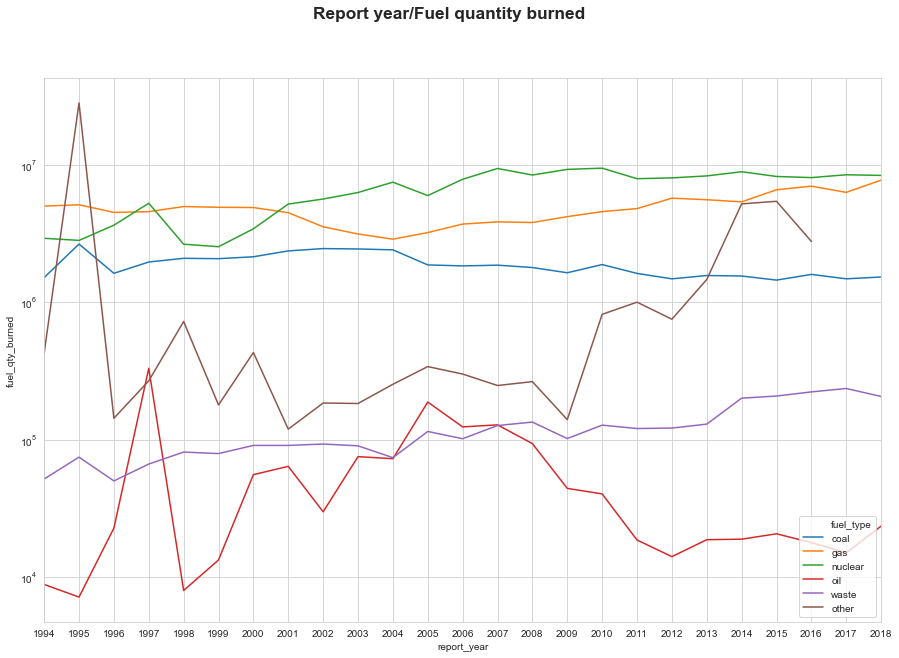

In [23]:
figs,ax = plt.subplots(figsize=(15,10))
sns.lineplot('report_year','fuel_qty_burned',data=data,hue='fuel_type',ax=ax,ci=None)
ax.set_xticks(list(data['report_year'].unique()))
ax.set_xlim((1994,2018))
ax.set_yscale('log')
ax.legend(loc='lower right')
figs.suptitle('Report year/Fuel quantity burned',fontsize='xx-large',fontweight='bold');

From the above we can see the following (NB: This observation covers information till 2018, whenever I refer to the present, I will be referring to the year 2018 and I will also be referring to the quantity burned not price):
* coal has been quite stable over the years with the biggest spike in the early years, between 1994 and 1996, it is currently on a slight decline
* gas has been on slight decline till 2004 and is currently on the rise 
* nuclear has been quite unstable finally rising to hit its peak in 2007 after which it has been quite stable
* oil has been very unstable hitting its peak in 1997 ever since been battling to reach its peak quantity
* waste has been quite good at not falling lower its bottom in 1996, it also hasn't declined in two consecutive years
* other has been very unstable and also the data dtopped capturing information about it in 2018, it could be as result of many things one of which could be proper segmentation of the so called 'other'

Text(0.5, 0.98, 'Report year/Fuel cost per unit burned')

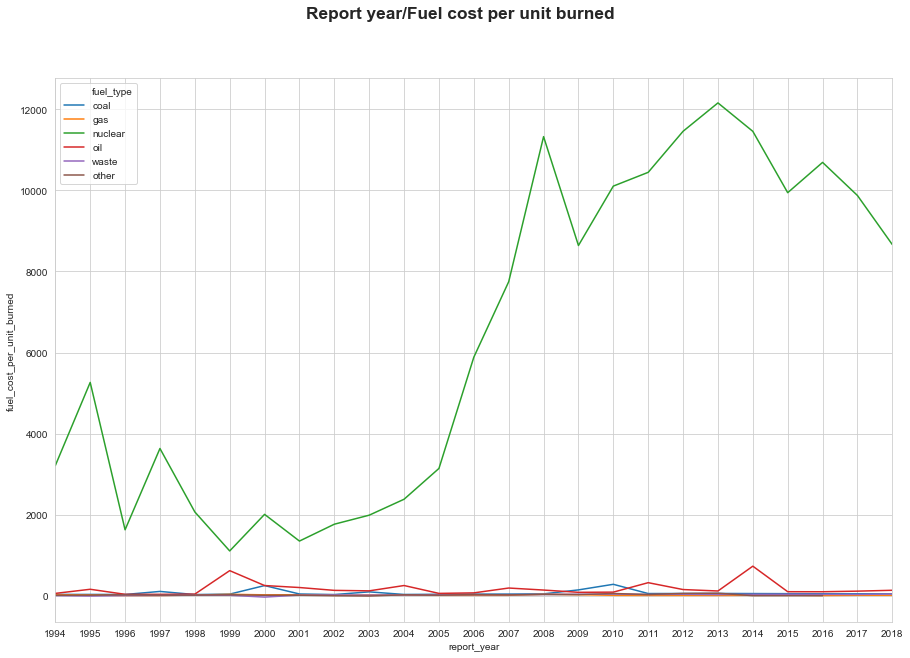

In [24]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot('report_year','fuel_cost_per_unit_burned',data=data,hue='fuel_type',ax=ax,ci=None)
ax.set_xticks(list(data['report_year'].unique()))
ax.set_xlim((1994,2018))
ax.legend(loc='upper left')
fig.suptitle('Report year/Fuel cost per unit burned',fontsize='xx-large',fontweight='bold')

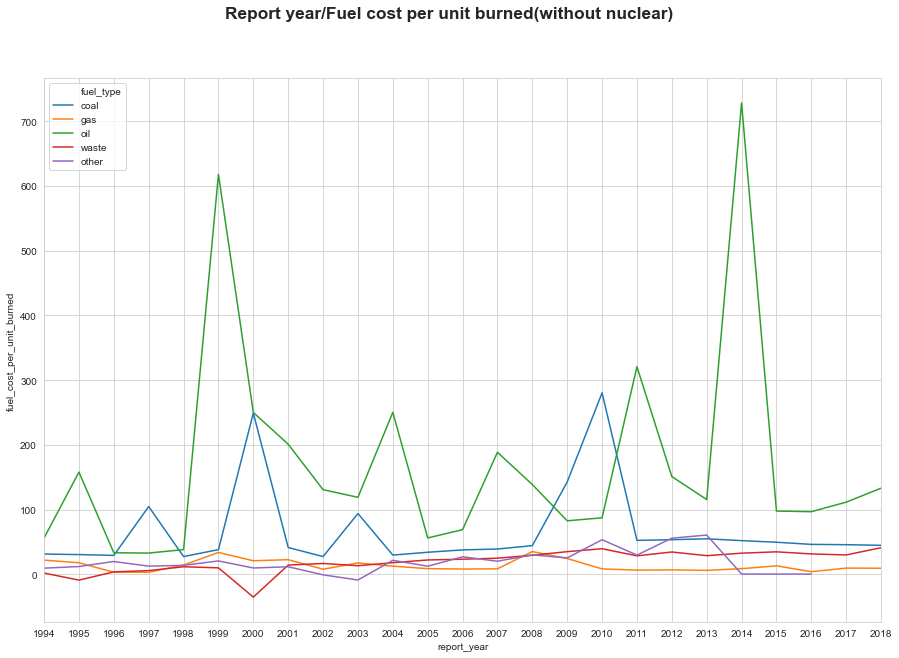

In [25]:
a = data.loc[data['fuel_type']!='nuclear']
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot('report_year','fuel_cost_per_unit_burned',data=a,hue='fuel_type',ax=ax,ci=None)
ax.set_xticks(list(a['report_year'].unique()))
ax.set_xlim((1994,2018))
ax.legend(loc='upper left')
fig.suptitle('Report year/Fuel cost per unit burned(without nuclear)',fontsize='xx-large',fontweight='bold');

We can see from the two graphs above that,

* nuclear has been the most expensive option since inception
* oil has been the next most expensive on the list with a large degree of volality
* due to the large volatility of oil, coal has been able to put out  competition and even gain the advantage over oil(2010)
* the price of the rest has been quite stable

In [26]:
data.columns

Index(['record_id', 'utility_id', 'report_year', 'plant_name', 'fuel_type',
       'fuel_unit', 'fuel_qty_burned', 'fuel_mmbtu_per_unit',
       'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered',
       'fuel_cost_per_mmbtu'],
      dtype='object')

Let's add a few more columns

In [27]:
data['total_cost_burned'] = data['fuel_qty_burned']*data['fuel_cost_per_unit_burned']
data['fuel_cost_per_unit'] = data['fuel_cost_per_mmbtu']*data['fuel_mmbtu_per_unit']
data['fuel_qty_burned_in_mmbtu'] = data['fuel_qty_burned']*data['fuel_mmbtu_per_unit']
data['fuel_cost_per_mmbtu_burned'] = round(data['fuel_cost_per_unit_burned']/data['fuel_mmbtu_per_unit'],3)
data['fuel_cost_per_mmbtu_delivered'] = round(data['fuel_cost_per_unit_delivered']/data['fuel_mmbtu_per_unit'],3)
data['operation_cost'] = data['fuel_cost_per_unit_burned'] + data['fuel_cost_per_unit_delivered']

In [28]:
data.head()

,record_id,utility_id,report_year,plant_name,fuel_type,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_cost_burned,fuel_cost_per_unit,fuel_qty_burned_in_mmbtu,fuel_cost_per_mmbtu_burned,fuel_cost_per_mmbtu_delivered,operation_cost
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,18.59739,8.921254e+07,1.121,1.117,37.12
1,f1_fuel_1994_12_1_0_10,1,1994,rockporttotalplant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,18.58304,1.739994e+08,1.120,1.117,37.11
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,39.81450,7.187562e+07,1.646,1.580,77.84
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,47.18150,8.956064e+07,1.971,1.920,93.20
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05,2.57000,4.053300e+04,2.770,2.770,5.54


From the observation, my newly formed column `fuel_cost_per_unit` is approximately equal to `fuel_cost_per_unit_burned`, so we might not need this column and also `fuel_cost_per_mmbtu_burned` is equal to `fuel_cost_per_mmbtu`

In [29]:
data.drop(['fuel_cost_per_unit','fuel_cost_per_mmbtu'],axis=1,inplace=True)

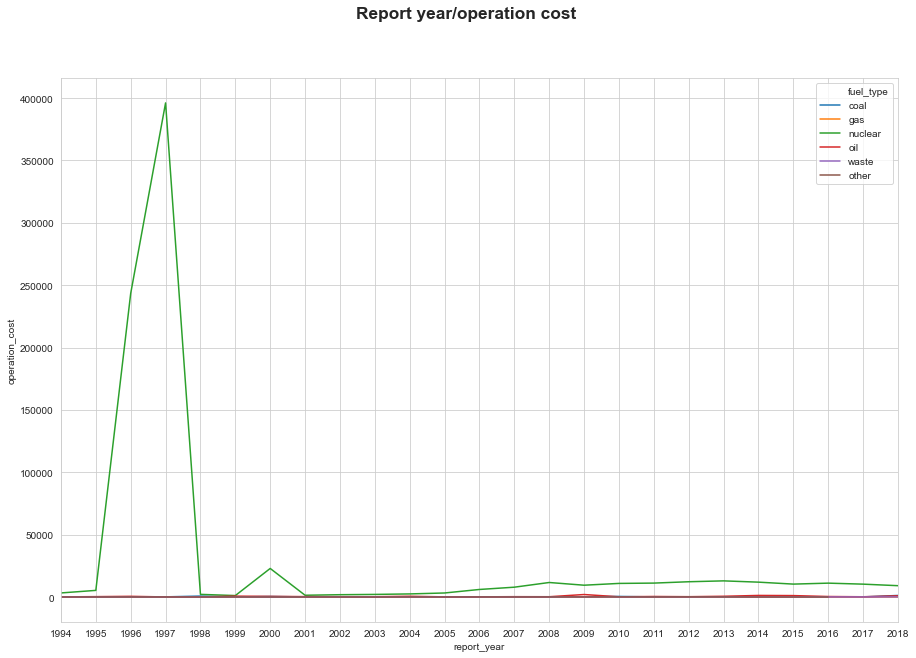

In [30]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot('report_year','operation_cost',data=data,hue='fuel_type',ax=ax,ci=None)
ax.set_xticks(list(data['report_year'].unique()))
ax.set_xlim((1994,2018))
ax.legend(loc='upper right')
fig.suptitle('Report year/operation cost',fontsize='xx-large',fontweight='bold');

Once again, nuclear plants seem to be the most expensive to operate

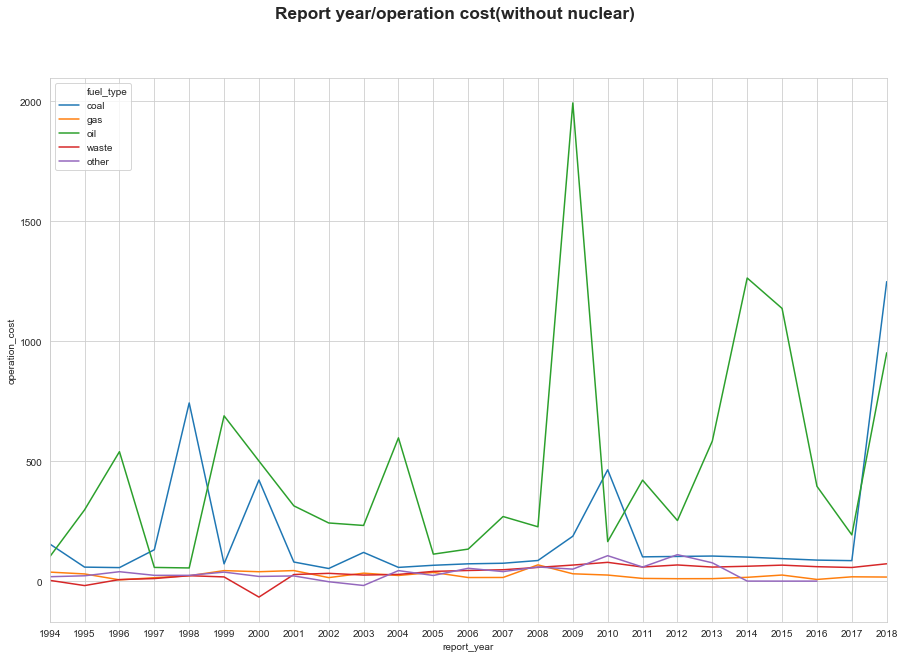

In [31]:
a = data.loc[data['fuel_type']!='nuclear']
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot('report_year','operation_cost',data=a,hue='fuel_type',ax=ax,ci=None)
ax.set_xticks(list(a['report_year'].unique()))
ax.set_xlim((1994,2018))
ax.legend(loc='upper left');
fig.suptitle('Report year/operation cost(without nuclear)',fontsize='xx-large',fontweight='bold');

While the cheapest to operate is gas

A  best year for each fuel type would be a year where the cost per unit of fuel delivered is greater than the cost per unit of fuel burned and the quantity of fuel delivered more than quantity of fuel burned. Since we weren't given the quantity of fuel delivered, we will check for years with lowest quantity of fuel burned and assume the  quantity delivered is more

In [32]:
data['Profit_loss_per_unit'] = data['fuel_cost_per_unit_delivered'] - data['fuel_cost_per_unit_burned']

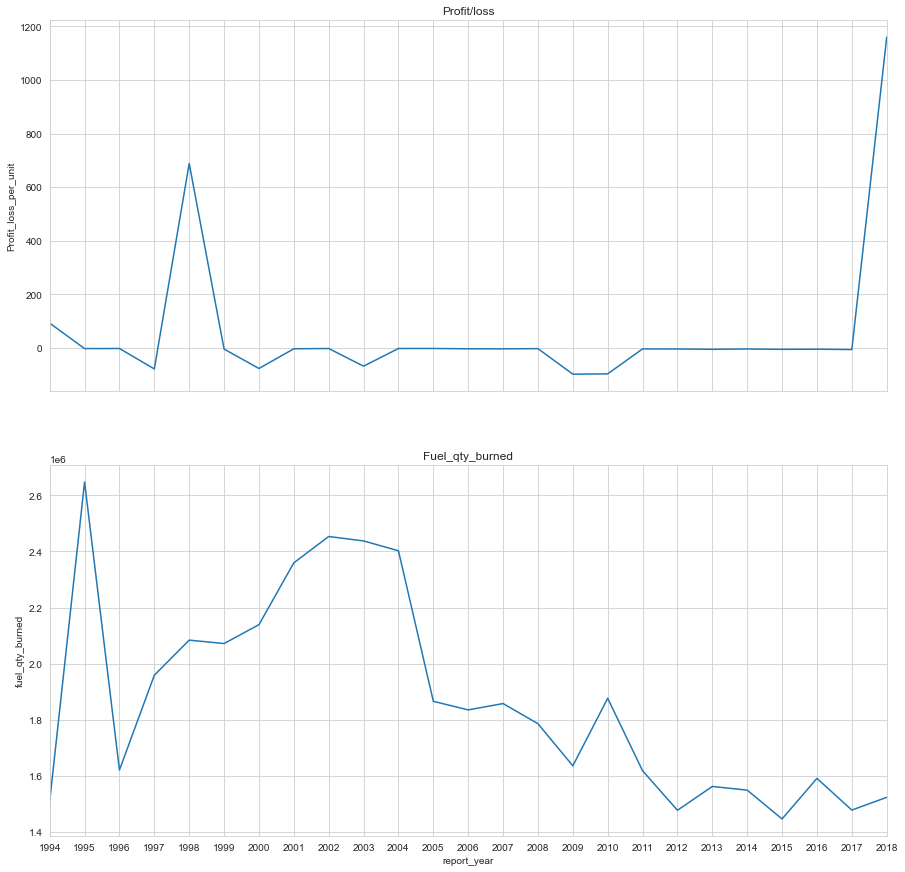

In [33]:
fig,ax = plt.subplots(figsize=(15,15),nrows=2,sharex=True)
sns.lineplot('report_year','Profit_loss_per_unit',data=data.loc[data['fuel_type']=='coal'],ax=ax[0],ci=None)
ax[0].set_title('Profit/loss')
sns.lineplot('report_year','fuel_qty_burned',data=data.loc[data['fuel_type']=='coal'],ax=ax[1],ci=None)
ax[1].set_xticks(list(data['report_year'].unique()))
ax[1].set_xlim((1994,2018))
ax[1].set_title('Fuel_qty_burned');

for coal, that best year would be 2018

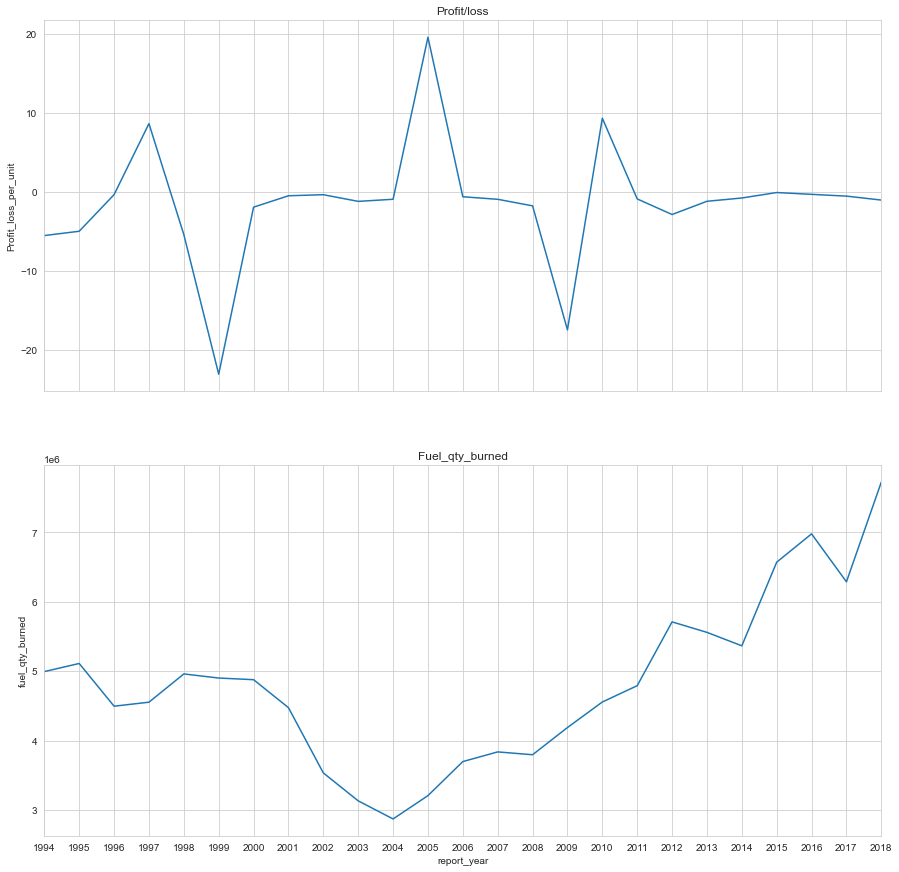

In [34]:
fig,ax = plt.subplots(figsize=(15,15),nrows=2,sharex=True)
sns.lineplot('report_year','Profit_loss_per_unit',data=data.loc[data['fuel_type']=='gas'],ax=ax[0],ci=None)
ax[0].set_title('Profit/loss')
sns.lineplot('report_year','fuel_qty_burned',data=data.loc[data['fuel_type']=='gas'],ax=ax[1],ci=None)
ax[1].set_xticks(list(data['report_year'].unique()))
ax[1].set_xlim((1994,2018))
ax[1].set_title('Fuel_qty_burned');

For gas, that best year would be 2005

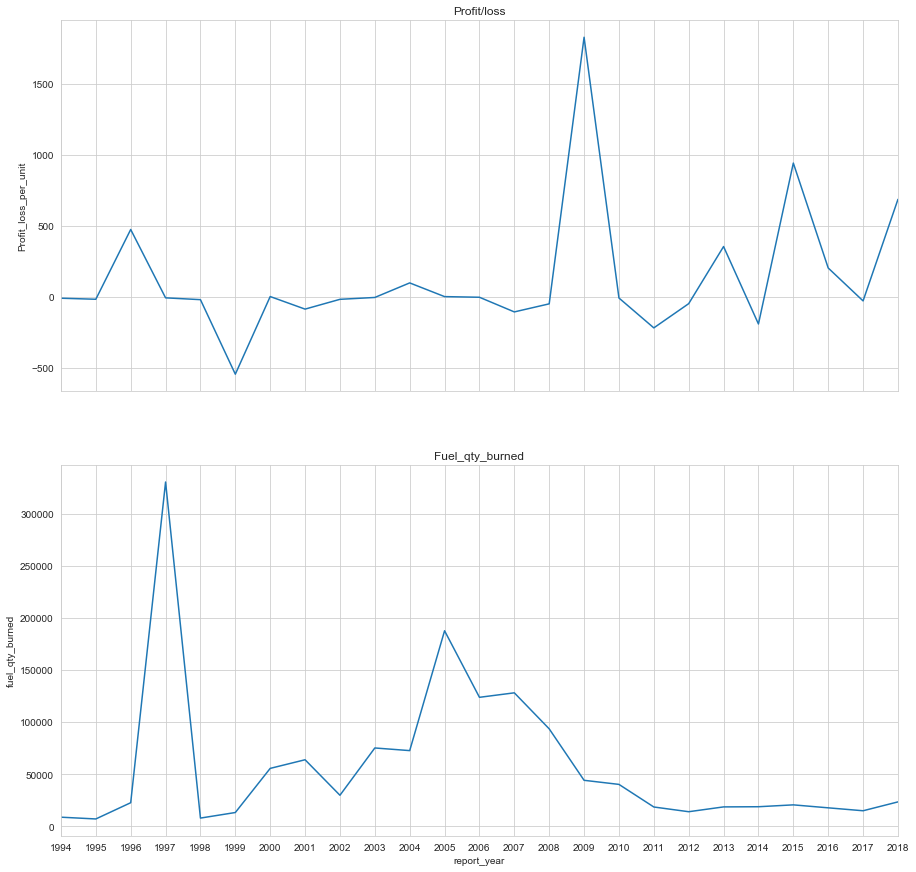

In [35]:
fig,ax = plt.subplots(figsize=(15,15),nrows=2,sharex=True)
sns.lineplot('report_year','Profit_loss_per_unit',data=data.loc[data['fuel_type']=='oil'],ax=ax[0],ci=None)
ax[0].set_title('Profit/loss')
sns.lineplot('report_year','fuel_qty_burned',data=data.loc[data['fuel_type']=='oil'],ax=ax[1],ci=None)
ax[1].set_xticks(list(data['report_year'].unique()))
ax[1].set_xlim((1994,2018))
ax[1].set_title('Fuel_qty_burned');

For oil, that best year would be either 2009 and 2015

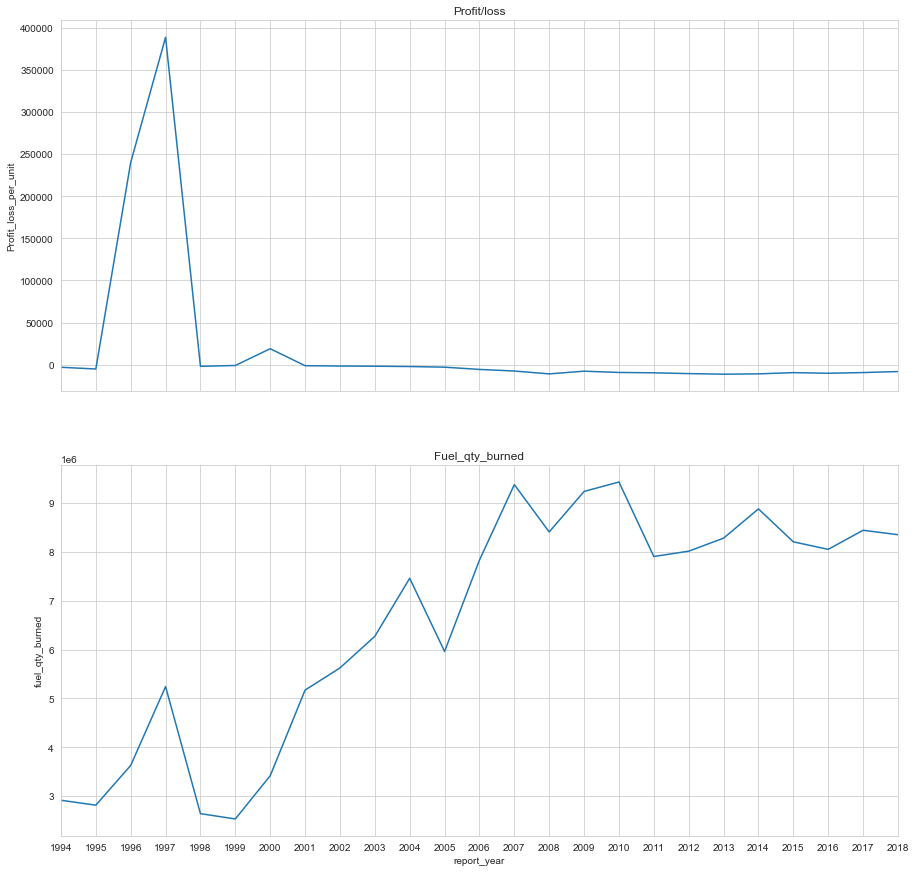

In [36]:
fig,ax = plt.subplots(figsize=(15,15),nrows=2,sharex=True)
sns.lineplot('report_year','Profit_loss_per_unit',data=data.loc[data['fuel_type']=='nuclear'],ax=ax[0],ci=None)
ax[0].set_title('Profit/loss')
sns.lineplot('report_year','fuel_qty_burned',data=data.loc[data['fuel_type']=='nuclear'],ax=ax[1],ci=None)
ax[1].set_xticks(list(data['report_year'].unique()))
ax[1].set_xlim((1994,2018))
ax[1].set_title('Fuel_qty_burned');

For nuclear, that best year would be 1996

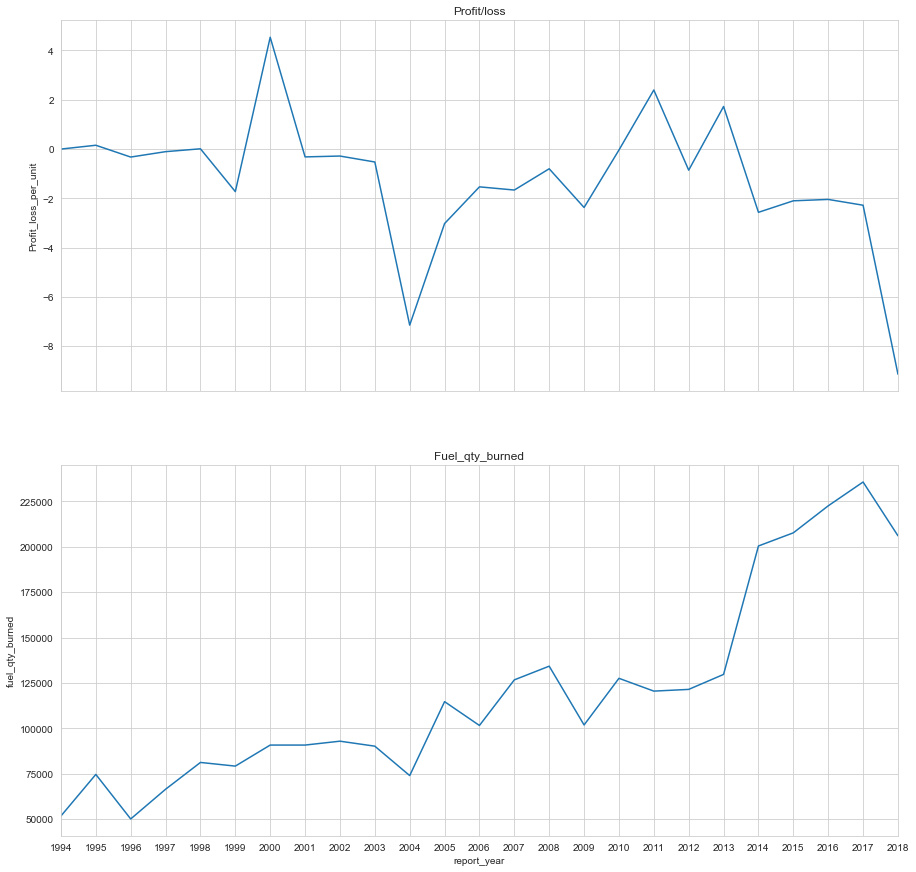

In [37]:
fig,ax = plt.subplots(figsize=(15,15),nrows=2,sharex=True)
sns.lineplot('report_year','Profit_loss_per_unit',data=data.loc[data['fuel_type']=='waste'],ax=ax[0],ci=None)
ax[0].set_title('Profit/loss')
sns.lineplot('report_year','fuel_qty_burned',data=data.loc[data['fuel_type']=='waste'],ax=ax[1],ci=None)
ax[1].set_xticks(list(data['report_year'].unique()))
ax[1].set_xlim((1994,2018))
ax[1].set_title('Fuel_qty_burned');

For waste, that best year is 2000

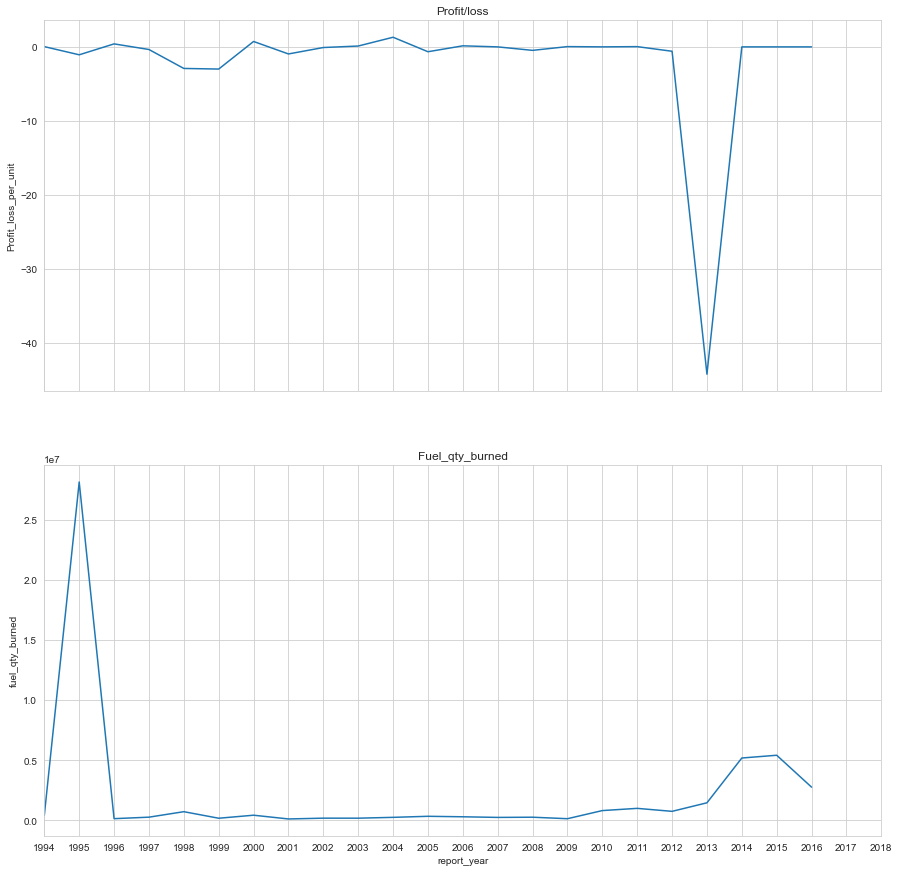

In [38]:
fig,ax = plt.subplots(figsize=(15,15),nrows=2,sharex=True)
sns.lineplot('report_year','Profit_loss_per_unit',data=data.loc[data['fuel_type']=='other'],ax=ax[0],ci=None)
ax[0].set_title('Profit/loss')
sns.lineplot('report_year','fuel_qty_burned',data=data.loc[data['fuel_type']=='other'],ax=ax[1],ci=None)
ax[1].set_xticks(list(data['report_year'].unique()))
ax[1].set_xlim((1994,2018))
ax[1].set_title('Fuel_qty_burned');

For other, that best year is 2004

In [40]:
data.to_csv('Data/cleandata.csv')